

# Modelos Estadísticos 
# Lizeth Adriel Romero Cervantes




## Probabilidad Laplaciana

Para un experimento aleatorio, se tiene que $\Omega$ es el espacio muestral.

Sea $A$ un evento, entonces

$$ \mathbb{P}(A) = \frac{|A|}{|\Omega|} $$

**Ejemplo** Sea el experimento aleatorio de lanzar una moneda 3 veces, de manera independiente, es decir, el $i$-ésimo lanzamiento no me afecta al $i+1$ lanzamiento. El espacio muestral de este experimento es:
$$ \Omega = \{ A,S \} \times \{ A,S \} \times \{ A,S \}  = \{ A,S \}^3$$

$$ (S,S,S),(S,A,S)$$
 

y se tiene que $|\Omega| = 2^{3}$.

Sean los eventos:
- $A$: todos los resultados son águila
- $S$: todos los resultados son soles
- $E$: por lo menos un resultado es sol

Calcular las probabilidades de $A$, $S$ y $E$.

**Solución** Para $A$, vamos a descomponer al conjunto de la siguiente manera: $A = A_1 \cap A_2 \cap A_3$ donde $A_{i}:$ cae águila en el i-esimo coordenada.

In [4]:
# Vamos a crear el espacio muestral

# Importamos el modulo 
import itertools
from itertools import product

In [5]:
Omega = set(product({"A","S"}, repeat=3))
# product -> genera todas las tuplas de longitud 3
# set -> lo convierte en conjunto
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [6]:
# La cardinalidad de Omega es:
len(Omega)

8

In [7]:
# Vamos a crear el evento A1
A_1 = {om for om in Omega if om[0]=="A"} 
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [8]:
# Vamos a crear el evento A_2
A_2 = {om for om in Omega if om[1]=="A"} 
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [9]:
# Vamos a crear el evento A_2
A_3 = {om for om in Omega if om[2]=="A"} 
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [10]:
# Vamos a crear el evento A
A = A_1.intersection(A_2.intersection(A_3))  #A1\cap(A_2 \cap A_3)
A

{('A', 'A', 'A')}

In [11]:
card_A = len(A)

In [12]:
# Calculamos la probabilidad 
P_A = card_A / len(Omega)
P_A

0.125

Si yo quiero expresar mi resultado en fracción:

In [13]:
from fractions import Fraction
def p(E,Omega):
    p = Fraction(len(E),len(Omega))
    return p

In [14]:
proba_A = p(A,Omega)
proba_A

Fraction(1, 8)

## Lanzamiento de un dado

Supongamos que lanzamos un dado justo de 6 caras.  
Queremos calcular la probabilidad de que salga un número **par**.

### Enfoque Laplaciano

La probabilidad de un evento \(A\) se calcula como:


$P(A) = \frac{\text{número de casos favorables}}{\text{número de casos posibles}}$


### Definición de los casos

- Casos posibles: \(\{1, 2, 3, 4, 5, 6\}\) → 6 posibles.  
- Casos favorables (número par): \(\{2, 4, 6\}\) → 3 posibles.  


$P(\text{número par}) = \frac{3}{6} = 0.5$

In [15]:
# Definir los casos posibles
caras = [1, 2, 3, 4, 5, 6]

# Definir el evento: número par
evento_par = [x for x in caras if x % 2 == 0]

# Probabilidad Laplaciana
P_par = len(evento_par) / len(caras)

print(f"Casos posibles: {caras}")
print(f"Casos favorables (pares): {evento_par}")
print(f"Probabilidad de sacar un número par: {P_par:.2f}")


Casos posibles: [1, 2, 3, 4, 5, 6]
Casos favorables (pares): [2, 4, 6]
Probabilidad de sacar un número par: 0.50


In [16]:
# verificamos el resultado realizando una simulación
import numpy as np

n_simulaciones = 100000
lanzamientos = np.random.randint(1, 7, size=n_simulaciones)  # Genera números entre 1 y 6

# Contar cuántos son pares
pares = np.sum(lanzamientos % 2 == 0)

# Probabilidad simulada
P_simulada = pares / n_simulaciones
print(f"Probabilidad simulada de número par: {P_simulada:.4f}")

Probabilidad simulada de número par: 0.5011


## Ejemplo: Probabilidad Laplaciana con cartas

**Problema:**  
Se saca una carta al azar de una baraja estándar de 52 cartas.  
Calcular la probabilidad de que la carta sea un **corazón o un número par**.



### Solución paso a paso

1. **Espacio muestral:**  
$(|\Omega| = 52)$ (todas las cartas de la baraja)

2. **Evento favorable:**  
- Cartas de corazones: 13 cartas  
- Cartas con número par (2, 4, 6, 8, 10) en los cuatro palos: $(5 \times 4 = 20)$ cartas  
- Intersección (corazones y pares): 2, 4, 6, 8, 10 de corazones → 5 cartas  

Usando la fórmula de unión:  


$|A \cup B| = |A| + |B| - |A \cap B| = 13 + 20 - 5 = 28$

3. **Probabilidad Laplaciana:**


$P(\text{corazón o número par}) = \frac{28}{52} \approx 0.5385$

In [17]:
# Palos y valores de la baraja
palos = ['corazones', 'diamantes', 'tréboles', 'picas']
valores = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

# Espacio muestral
baraja = [(v, p) for p in palos for v in valores]

# Evento: corazón o número par
evento = [carta for carta in baraja if carta[1]=='corazones' or carta[0] in ['2','4','6','8','10']]

# Probabilidad Laplaciana
P = len(evento) / len(baraja)

print("Número de casos favorables:", len(evento))
print("Número de casos totales:", len(baraja))
print("Probabilidad de corazón o número par:", P)

Número de casos favorables: 28
Número de casos totales: 52
Probabilidad de corazón o número par: 0.5384615384615384


## Probabilidad condicional

Si añadimos condiciones a nuestro experimento en cuestión, la probabilidad cambia. 

Definimos la probabilidad de que ocurra un evento $A$ **sabiendo** que ocurre un evento $B$,
$$ \mathbb{P}(A \mid B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)} = \frac{|A\cap B|}{|B|}$$
donde $\mathbb{P}(B)>0$.


In [18]:
# Vamos a definir la función para la proba condicional

def prob_cond(E,F):
    return len(E & F) / len(F)

Quiero calcular la probabilidad condicional de los siguientes eventos:

- B: El primer lanzamiento es águila
- C: Dos de los resultados son águila (exactamente)

In [19]:
# El primer lanzamiento es águila
B = {om for om in Omega if om[0]=="A"}
B

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [20]:
# Dos de los resultados son águila 
C = {om for om in Omega if om.count("A")==2}
C

{('A', 'A', 'S'), ('A', 'S', 'A'), ('S', 'A', 'A')}

In [21]:
prob_cond(B,C)

0.6666666666666666

**Ejemplo:** En una urna hay:

5 bolas blancas, 7 bolas negras, 3 bolas rojas

Se extraen dos bolas sin reemplazo. ¿Cuál es la probabilidad de que la segunda bola sea roja, dado que la primera fue blanca?

In [22]:
# Definir las probabilidades
P_A = 5 / 15  # Probabilidad de que la primera bola sea blanca
P_A_interseccion_B = (5 / 15) * (3 / 14)  # Probabilidad de que la primera sea blanca y la segunda roja

# Calcular la probabilidad condicional
P_B_dado_A = P_A_interseccion_B / P_A

# Mostrar el resultado
print(f"La probabilidad de que la segunda bola sea roja dado que la primera fue blanca es: {P_B_dado_A:.4f}")

La probabilidad de que la segunda bola sea roja dado que la primera fue blanca es: 0.2143


In [23]:
# Para verificar el resultado realizamos simulación 

import numpy as np

# Definir la urna
urna = ['B', 'B', 'B', 'B', 'B',  # 5 bolas blancas
        'N', 'N', 'N', 'N', 'N', 'N', 'N',  # 7 bolas negras
        'R', 'R', 'R']  # 3 bolas rojas

# Número de simulaciones
n_simulaciones = 100000 # realizamos 100,000 simulaciones 
resultados = []

# Simular las extracciones
for _ in range(n_simulaciones):
    np.random.shuffle(urna)
    primera = urna[0]
    segunda = urna[1]
    if primera == 'B' and segunda == 'R':
        resultados.append(True)
    else:
        resultados.append(False)

# Calcular la probabilidad simulada
P_simulada = sum(resultados) / n_simulaciones
print(f"Probabilidad simulada: {P_simulada:.4f}")

Probabilidad simulada: 0.0718


**Ejemplo:** Probabilidad condicional con cartas

Problema:
Se saca una carta al azar de una baraja estándar de 52 cartas.
Sea 
𝐴
A = "la carta es un corazón"
y 
𝐵
B = "la carta es un número par (2,4,6,8,10)".

Calcular la probabilidad de que la carta sea un corazón dado que es un número par, es decir:

𝑃
(
𝐴
∣
𝐵
)
P(A∣B)

In [24]:
# Palos y valores de la baraja
palos = ['corazones', 'diamantes', 'tréboles', 'picas']
valores = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

# Crear baraja
baraja = [(v, p) for p in palos for v in valores]

# Evento A: carta es corazón
A = [carta for carta in baraja if carta[1]=='corazones']

# Evento B: carta es número par
B = [carta for carta in baraja if carta[0] in ['2','4','6','8','10']]

# Intersección A ∩ B
A_inter_B = [carta for carta in baraja if carta in A and carta in B]

# Probabilidad condicional
P_condicional = len(A_inter_B) / len(B)

print("Número de cartas en A ∩ B:", len(A_inter_B))
print("Número de cartas en B:", len(B))
print("Probabilidad condicional P(A|B):", P_condicional)


Número de cartas en A ∩ B: 5
Número de cartas en B: 20
Probabilidad condicional P(A|B): 0.25


## Independencia de eventos 

Decimos que dos eventos $A$ y $B$ son independientes si
$$ \mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$$
o de manera equivalente 
$$ \mathbb{P}(A \mid B) \mathbb{P}(A) $$

In [25]:
def prob(E):
    return len(E) / len(Omega)

In [26]:
def indep(E,F):
    return prob(E & F) == prob(E)*prob(F)

In [28]:
indep=(B,C)

**Ejercicio** Calcular las probabilidades faltantes
- $S$: todos los resultados son soles
- $E$: por lo menos un resultado es sol

In [ ]:
# Espacio muestral con 3 lanzamientos
from itertools import product


In [ ]:
Omega = set(product(["A","S"], repeat=3))

In [ ]:
# Eventos
S = {om for om in Omega if om == ("S","S","S")}                  # Todos soles
E = {om for om in Omega if "S" in om}                            # Al menos un sol

In [ ]:
# Funciones de probabilidad
def prob(E):
    return len(E)/len(Omega)

def prob_cond(A,B):
    return len(A & B)/len(B)

In [ ]:
# Resultados
print("P(S) =", prob(S))
print("P(E) =", prob(E))
print("P(S | E) =", prob_cond(S,E))
print("P(E | S) =", prob_cond(E,S))

P(S) = 0.125
P(E) = 0.875
P(S | E) = 0.14285714285714285
P(E | S) = 1.0


**Ejemplo:**
En una urna hay: 3 bolas rojas, 2 bolas negras, 5 bolas blancas

Se extraen dos bolas con reemplazo. Queremos determinar si los eventos:

*A:* La primera bola es roja.

*B:* La segunda bola es roja.

son independientes.

In [ ]:
# Definir las probabilidades
P_A = 3 / 10  # Probabilidad de que la primera bola sea roja
P_B = 3 / 10  # Probabilidad de que la segunda bola sea roja (con reemplazo)

# Calcular la probabilidad de ambos eventos ocurriendo
P_A_interseccion_B = P_A * P_B

# Mostrar el resultado
print(f"P(A ∩ B) = {P_A_interseccion_B:.4f}")
print(f"P(A) * P(B) = {P_A * P_B:.4f}")


P(A ∩ B) = 0.0900
P(A) * P(B) = 0.0900


In [ ]:
# VErificamos el resultado mediante una simulación 
import numpy as np

# Definir la urna
urna = ['R', 'R', 'R', 'N', 'N', 'B', 'B', 'B', 'B', 'B']  # 3 bolas rojas, 2 negras, 5 blancas

# Número de simulaciones
n_simulaciones = 100000
resultados = []

# Simular las extracciones
for _ in range(n_simulaciones):
    primera = np.random.choice(urna)  # Extraemos la primera bola
    segunda = np.random.choice(urna)  # Extraemos la segunda bola (con reemplazo)
    if primera == 'R' and segunda == 'R':
        resultados.append(True)
    else:
        resultados.append(False)

# Calcular la probabilidad simulada
P_simulada = sum(resultados) / n_simulaciones
print(f"Probabilidad simulada: {P_simulada:.4f}")


Probabilidad simulada: 0.0899


**Ejemplo:** Independencia de eventos con cartas

Problema:
Se saca una carta al azar de una baraja estándar de 52 cartas.
Definimos los eventos:

𝐴 = "la carta es un corazón"

𝐵 = "la carta es un rey"

Determinar si 
𝐴
 y 
𝐵
 son independientes.

In [ ]:
# Palos y valores de la baraja
palos = ['corazones', 'diamantes', 'tréboles', 'picas']
valores = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

# Crear baraja
baraja = [(v, p) for p in palos for v in valores]

# Evento A: carta es corazón
A = [carta for carta in baraja if carta[1] == 'corazones']

# Evento B: carta es rey
B = [carta for carta in baraja if carta[0] == 'K']

# Intersección A ∩ B
A_inter_B = [carta for carta in baraja if carta in A and carta in B]

# Probabilidades
P_A = len(A) / len(baraja)
P_B = len(B) / len(baraja)
P_A_B = len(A_inter_B) / len(baraja)

# Verificar independencia
independientes = P_A_B == P_A * P_B

print("P(A):", P_A)
print("P(B):", P_B)
print("P(A ∩ B):", P_A_B)
print("P(A)*P(B):", P_A*P_B)
print("¿Son independientes?", independientes)


P(A): 0.25
P(B): 0.07692307692307693
P(A ∩ B): 0.019230769230769232
P(A)*P(B): 0.019230769230769232
¿Son independientes? True


# Probabilidad Frecuentista

El espacio muestral es un conjunto finito, y podemos definir la probabilidad asociada a un evento $A$:

$$ f_n(A) = \frac{n(A)}{n} $$

donde $n(A)$ es el número de veces que ocurre $A$ y $n$ es el número de veces que se realiza el experimento.

In [ ]:
import random #para generar números aleatorios

Se tiene el lanzamiento de monedas (no justas) ---> volados

In [ ]:
def volado(p): #regresa la proba de obtener sol
    return 'sol' if random.random() < p else 'águila' #random.random() genera un número entre 0 y 1

In [ ]:
volado(0.4)

'águila'

In [ ]:
# Vamos a realizar 10 volados con p=0.4
a = [volado(0.4) for i in range(10)] # creando una lista
a

['águila',
 'águila',
 'águila',
 'sol',
 'águila',
 'águila',
 'águila',
 'sol',
 'águila',
 'águila']

In [ ]:
# Para contar el número de soles en una lista
a.count('sol')

2

In [ ]:
# Para contar el número de aguilas en una lista
a.count('águila')

8

In [ ]:
# Tambien se puede hacer con un bucle
resultados = [] #lista vacia
for i in range(10):
    resultado = volado(0.4)
    resultados.append(resultado)
resultados

['sol', 'sol', 'águila', 'sol', 'sol', 'sol', 'sol', 'sol', 'águila', 'sol']

# Ahora vamos a simular nuestra probabilidad frecuentista

In [ ]:
p = [] #lista vacia para almacenar probabilidades

for i in range(1000): #realizamos 1000 experimentos
    N = 1000 #cada experimento tiene 1000 volados
    resultados = [] #almacena 'sol' o 'águila' de ese experimento

    for i in range(N):
        resultado = volado(0.63)
        resultados.append(resultado)

    n_soles = resultados.count('sol') #cuenta el número de soles
    p_soles = n_soles / N #calcula la probabilidad frecuentista

    p.append(p_soles) #almacena las probabilidades en la lista p

# Probabilidad frecuentista promedio
p_soles_prom = sum(p) / 1000 # por la Ley de los Grandes Números

print(f'Probabilidad frecuentista promedio de obtener sol: {p_soles_prom}')   

Probabilidad frecuentista promedio de obtener sol: 0.6299830000000001


**Ejemplo**
En una urna hay:

5 bolas blancas, 7 bolas negras,3 bolas rojas

Se extraen dos bolas sin reemplazo. ¿Cuál es la probabilidad de que la segunda bola sea roja, dado que la primera fue blanca?

In [ ]:
# Definir las probabilidades
P_A = 5 / 15  # Probabilidad de que la primera bola sea blanca
P_A_interseccion_B = (5 / 15) * (3 / 14)  # Probabilidad de que la primera sea blanca y la segunda roja

# Calcular la probabilidad condicional
P_B_dado_A = P_A_interseccion_B / P_A

# Mostrar el resultado
print(f"La probabilidad de que la segunda bola sea roja dado que la primera fue blanca es: {P_B_dado_A:.4f}")


La probabilidad de que la segunda bola sea roja dado que la primera fue blanca es: 0.2143


In [ ]:
import numpy as np  # Importamos la librería NumPy para manejo de arreglos y funciones aleatorias


urna = ['B', 'B', 'B', 'B', 'B',  # 5 bolas blancas
        'N', 'N', 'N', 'N', 'N', 'N', 'N',  # 7 bolas negras
        'R', 'R', 'R']  # 3 bolas rojas


# Definimos cuántas veces vamos a repetir el experimento para aproximar la probabilidad
n_simulaciones = 100000

# Lista para almacenar los resultados de cada simulación
# True si la primera bola es blanca y la segunda roja, False en caso contrario
resultados = []

for _ in range(n_simulaciones):
    np.random.shuffle(urna)  # Mezclamos aleatoriamente la urna
    primera = urna[0]  # Tomamos la primera bola
    segunda = urna[1]  # Tomamos la segunda bola
    # Verificamos si la primera bola es blanca y la segunda es roja
    if primera == 'B' and segunda == 'R':
        resultados.append(True)
    else:
        resultados.append(False)


# Sumamos los True en resultados y lo dividimos entre el número total de simulaciones
P_simulada = sum(resultados) / n_simulaciones

# Mostramos el resultado
print(f"Probabilidad simulada: {P_simulada:.4f}")


Probabilidad simulada: 0.0706


**Ejemplo**: Probabilidad frecuentista de un defecto en productos

Problema:
Una fábrica produce 1000 unidades de un producto.
Al inspeccionarlas, se encuentra que 47 unidades presentan algún defecto.
Calcular la probabilidad frecuentista de que una unidad esté defectuosa.

In [ ]:
# Número total de productos
total_productos = 1000

# Número de productos defectuosos
defectuosos = 47

# Probabilidad frecuentista
P_defecto = defectuosos / total_productos

print("Número total de productos:", total_productos)
print("Número de defectuosos:", defectuosos)
print("Probabilidad frecuentista de defecto:", P_defecto)


# El problema del encuentro 

Romeo y Julieta pretenden encntrarse en un lugar especifico 

- Si Romeo llega primero,entonces piensa esperar 10 minutos 
- Si julieta llega primero, entonces piensa esperar 10 minutos 


se elige un número al azar entre 0 y 60, y supongamos que el par de numeros se elige sobre el cuadrado de modo que la probabilidad de un evento sea el area favorable entre el area total 


La probabilidad del evento A es: 0.30626.


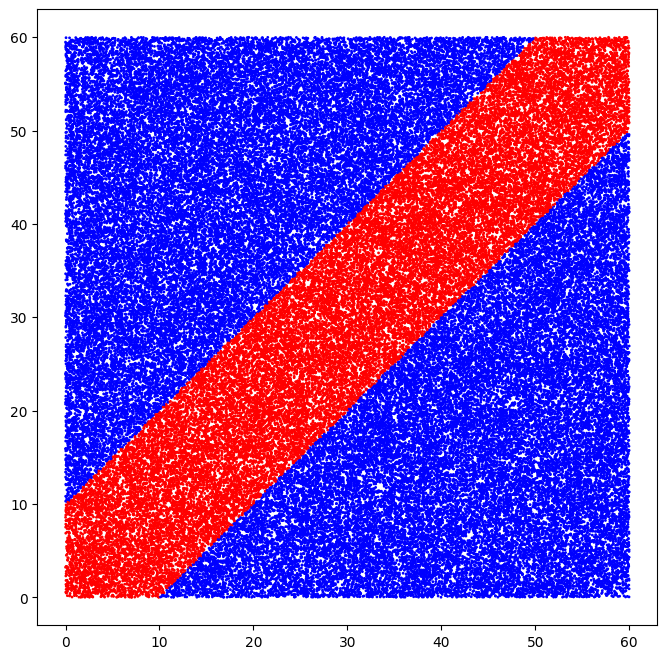

In [ ]:
# sea el evento 
# A: Romero y julieta se encuentran a una distancia de 10 minutos 

import numpy as np
import matplotlib.pyplot as plt

# Vamos a generar 100,000 simulaciones
muestra = 100000

# Generemos los tiempos aleatorios entre [0,60]
# x : tiempo de llegada de Romeo
# y : tiempo de llegada de Julieta

x = np.random.uniform(0, 60, muestra) # genera 100,000 números aleatorios entre 0 y 60
y = np.random.uniform(0, 60, muestra) # genera 100,000 números aleatorios entre 0 y 60

# Vamos a añadir mi condición de encuentro
encuentro = np.where(abs(x-y) <=10, 'r', 'b') 
# Si la diferencia entre los tiempos de llegada es menor o igual a 10, se encuentran (rojo), si no, no se encuentran (azul)
# si no, no se encuentran (azul)

# Vamos a calcular la probabilidad de que se encuentren
k = 0
for elemento in encuentro:
    if elemento == 'r':
        k += 1

print("La probabilidad del evento A es: {}.".format(k/muestra))

# Para graficar los puntos de encuentre, hacemos una gráfica de dispersion
plt.figure(figsize=(8,8))
plt.scatter(x, y, c=encuentro, s=1)
plt.show()



## Ejemplo
Supongamos que en una fiesta hay n personas, y cada una tiene un sombrero. 
Al final de la fiesta, se recogen todos los sombreros y se reparten al azar entre las personas. 

¿Cuál es la probabilidad de que ninguna persona reciba su propio sombrero?





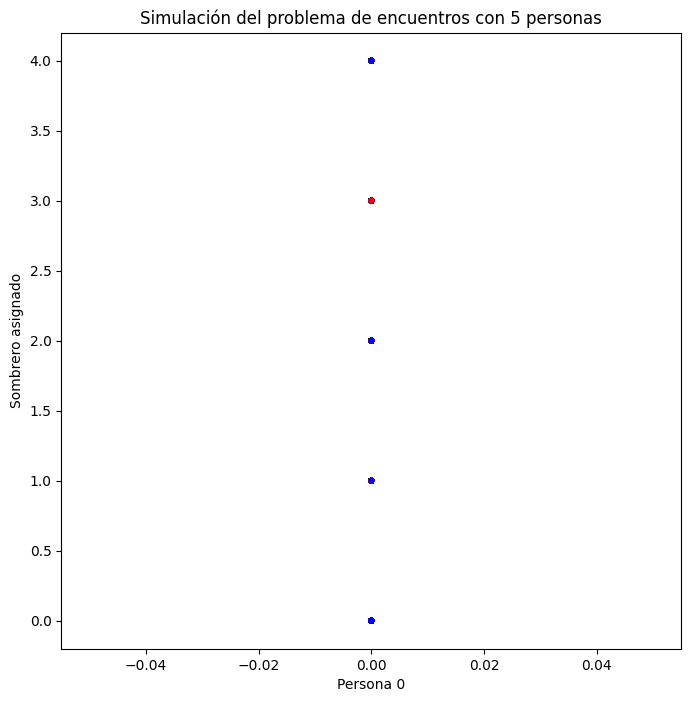

La probabilidad aproximada de que nadie reciba su propio sombrero: 0.36010


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número de personas
n = 5

# Número de simulaciones
simulaciones = 10000

# Arreglos para graficar
x_vals = []
y_vals = []
colores = []

for _ in range(simulaciones):
    # Personas y sombreros
    personas = np.arange(n)
    sombreros = np.arange(n)
    
    # Mezclamos los sombreros
    np.random.shuffle(sombreros)
    
    # Guardamos información para graficar
    x_vals.append(personas[0])  # podemos graficar solo la primera persona para simplificar
    y_vals.append(sombreros[0])
    
    # Verificamos si es derangement
    if not np.any(sombreros == personas):
        colores.append('r')  # derangement
    else:
        colores.append('b')  # al menos uno coincide

# Graficamos
plt.figure(figsize=(8,8))
plt.scatter(x_vals, y_vals, c=colores, s=10)
plt.xlabel("Persona 0")
plt.ylabel("Sombrero asignado")
plt.title(f"Simulación del problema de encuentros con {n} personas")
plt.show()

# Probabilidad aproximada
probabilidad = colores.count('r') / simulaciones
print(f"La probabilidad aproximada de que nadie reciba su propio sombrero: {probabilidad:.5f}")


**Referencias**

- Ross, S. M. (2020). *Introduction to probability and statistics for engineers and scientists* (6.ª ed.). Academic 

- Pishro-Nik, H. (2014). *Introduction to probability, statistics, and random processes*. CreateSpace Independent Publishing Platform.
